In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("dax_prepared.csv")

In [5]:
# creation d'une variable target pour la direction

df['target'] = (df['close'].shift(-1) > df['close']).astype(int)
df.head(10)

,time,open,high,low,close,tick_volume,spread,real_volume,ha_close,ha_open,ha_high,ha_low,ha_color,signal,ma50,ma200,rsi20,target
0,2014-08-26 00:00:00,9477.7,9593.3,9444.0,9569.9,20600,0,0,9521.225,9418.95,9593.30,9418.95,1,0,9530.878,9562.8270,65.822785,0
1,2014-08-27 00:00:00,9570.5,9601.1,9546.3,9551.8,16572,0,0,9567.425,9523.80,9601.10,9523.80,1,0,9525.112,9563.5690,64.303021,0
2,2014-08-28 00:00:00,9551.5,9566.3,9414.8,9477.2,26390,0,0,9502.450,9561.15,9566.30,9414.80,0,0,9518.022,9563.8455,60.634001,0
3,2014-08-29 00:00:00,9476.9,9517.6,9368.8,9457.6,22422,0,0,9455.225,9514.35,9517.60,9368.80,0,0,9509.068,9563.9740,64.413503,1
4,2014-08-31 00:00:00,9458.5,9463.9,9457.6,9462.1,106,0,0,9460.525,9467.25,9467.25,9457.60,0,1,9500.108,9564.1010,64.528363,1
5,2014-09-01 00:00:00,9462.7,9508.6,9424.0,9464.2,13287,0,0,9464.875,9460.30,9508.60,9424.00,1,1,9488.994,9563.9720,70.333333,1
6,2014-09-02 00:00:00,9464.5,9579.5,9463.6,9493.0,23995,0,0,9500.150,9463.45,9579.50,9463.45,1,1,9478.634,9564.0350,68.858195,1
7,2014-09-03 00:00:00,9493.3,9683.0,9490.6,9611.8,28534,0,0,9569.675,9478.75,9683.00,9478.75,1,0,9470.538,9564.8300,71.663176,1
8,2014-09-04 00:00:00,9611.2,9736.8,9538.3,9718.5,30356,0,0,9651.200,9552.55,9736.80,9538.30,1,0,9466.546,9565.9085,72.568740,1
9,2014-09-05 00:00:00,9718.2,9789.8,9689.3,9784.6,28463,0,0,9745.475,9664.85,9789.80,9664.85,1,0,9466.460,9567.2915,78.343118,0


In [6]:
# Normalisation de données pour l'apprentissage automatique

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = ['open', 'high', 'low', 'close', 'tick_volume', 'ma50', 'ma200', 'rsi20']
df[features] = scaler.fit_transform(df[features])

In [7]:
SEQ_LEN = 72
X, y = [], []

for i in range(SEQ_LEN, len(df)-1):
    X.append(df[features].iloc[i-SEQ_LEN:i].values)
    y.append(df['target'].iloc[i])

X, y = np.array(X), np.array(y)

In [8]:
# Division du dataset en training set et test set

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [9]:
# Vérification des données

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


X_train: (35675, 72, 8)
y_train: (35675,)
X_test: (8919, 72, 8)
y_test: (8919,)


c:\Users\jeanyves\Documents\Trading-Research\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
558/558 ━━━━━━━━━━━━━━━━━━━━ 80s 90ms/step - accuracy: 0.5138 - loss: 0.6932 - val_accuracy: 0.5154 - val_loss: 0.6927
Epoch 2/25
558/558 ━━━━━━━━━━━━━━━━━━━━ 41s 74ms/step - accuracy: 0.5151 - loss: 0.6927 - val_accuracy: 0.5154 - val_loss: 0.6928
Epoch 3/25
558/558 ━━━━━━━━━━━━━━━━━━━━ 80s 70ms/step - accuracy: 0.5146 - loss: 0.6928 - val_accuracy: 0.5154 - val_loss: 0.6927
Epoch 4/25
558/558 ━━━━━━━━━━━━━━━━━━━━ 41s 74ms/step - accuracy: 0.5158 - loss: 0.6927 - val_accuracy: 0.5154 - val_loss: 0.6927
Epoch 5/25
558/558 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.5158 - loss: 0.6927 - val_accuracy: 0.5154 - val_loss: 0.6927
Epoch 6/25
558/558 ━━━━━━━━━━━━━━━━━━━━ 45s 80ms/step - accuracy: 0.5155 - loss: 0.6928 - val_accuracy: 0.5154 - val_loss: 0.6927
Epoch 7/25
558/558 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.5158 - loss: 0.6927 - val_accuracy: 0.5154 - val_loss: 0.6927
Epoch 8/25
558/558 ━━━━━━━━━━━━━━━━━━━━ 41s 74ms/step - accuracy: 0.5158 - loss: 0.6927 - 

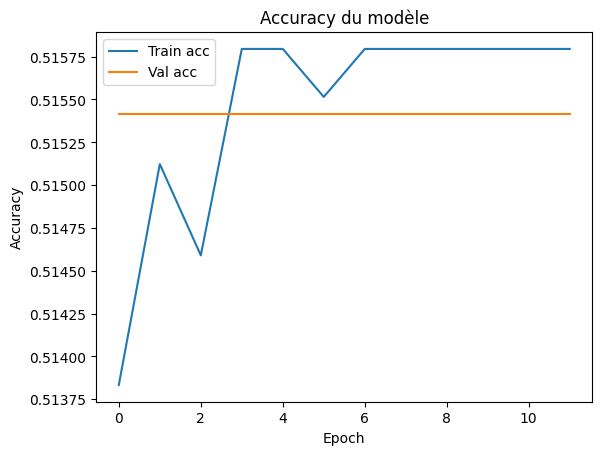

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# --- 1. Définition du modèle ---
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(72, 8)),
    Dropout(0.3),
    LSTM(32, return_sequences=False),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# --- 2. Compilation ---
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# --- 3. Entraînement ---
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=25,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# --- 4. Évaluation ---
loss, acc = model.evaluate(X_test, y_test)
print(f"✅ Test accuracy: {acc:.4f}")

# --- 5. Visualisation de l’apprentissage ---
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.title('Accuracy du modèle')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
